# Python OOP 2: Inheritance and Magic Methods

The purpose of this exercise is to test your new found knowledge of inheritance using the classical example of shapes. You have been given the base class (`AbstractShape`) which has some common functions for certain derived shapes, such as a triangle and a rectangle. 

In [1]:
from IPython.core.display import HTML
def css_styling():
    sheet = '../css/custom.css'
    styles = open(sheet, "r").read() 
    return HTML(styles)
css_styling()

## Tasks

1. Create a Rectangle class which also derives for AbstractShape, with methods
    * **`__init__`(self, base, height, center)**, which ONLY passes all arguments to the base class `__init__` via 
        
           super().__init__(base, height, center)

    * **get_vertices(self)**, which calculates and returns an array of vertices.
        - vertices should contain the vertex (x,y) points of a rectangle centered at the center point `self.center`: numpy array with shape (4,2)
        - Note that self.vertices in stored in the base class using a call to this method!
        - **If you're struggling, the contents of this function are provided at the end of this notebook**
    * **get_area(self)**, which calculates and returns the area of self (use attributes, not inputs)
    
    * Points to note:
         - The code for testing this class has been provided for you
         - Try to understand the order in which the initialisation functions are called.
         - Which methods are being called (from which classes) in the base initialiser?

2. Repeat 1. above for a Triangle class
    * Class layout is identical, but **get_vertices** and **get_area** different
    * The center point of the triangle should be the center point of the base line
    * **If you're struggling, the contents of this function are provided at the end of this notebook**

3. You have also been given a `Cuboid` class which has inherited a plot method, but this will plot only the 2D square
    * Override the **plot(self, ax)** method to scatter self.vertices (x, y, z) on the input axes
    - Note that the input axes given in the test code are already 3D axes - you do not need to implement this

4. See the end of this notebook for the magic methods extension

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib inline

In [3]:
class AbstractShape(object):
    """A class that shares common methods between rectangles and triangles:

    Note that some methods raise an error - what we are doing here is 
    actually creating 'abstract methods' which helps achieve a consistent
    API through all derived classes => This is Polymorphism!
    
    See example 07-PredatorPrey for a more robust way of defining abstract 
    base classes
    """
    def __init__(self, base, height, center):
        # Add all args as attributes- there are quicker/better ways
        # of doing this, but this is fine
        self.base = base
        self.height = height
        self.center = center
        
        # Call some methods: This will do nothing unless the methods are 
        # defined in the base classes!
        self.vertices = self.get_vertices()
        self.area = self.get_area()

        
    def plot(self, ax):
        # First point must be repeated for a closed plot
        x = np.hstack([self.vertices[:, 0], self.vertices[0, 0]])
        y = np.hstack([self.vertices[:, 1], self.vertices[0, 1]])

        ax.plot(x, y, '-')
    
    def get_vertices(self):
        raise NotImplementedError('Base class method should not be called directly')

    def get_area(self):
        raise NotImplementedError('Base class method should not be called directly')
    
    # Magic methods extension
    def __str__(self):
        return "Shape object - base={}, height={}, Area={}".format(self.base, self.height, self.area)

    def __lt__(self, shape):
        return self.area < shape.area

# Your classes here
class Rectangle(AbstractShape):
    def __init__(self, base=1, height=1, center=(0., 0.)):
        super().__init__(base, height, center)
    
    def get_vertices(self):
        pts = np.ones([4, 2]) * self.center
        xshift = self.base / 2.
        yshift = self.height / 2.
        pts[0,:] += np.array([-xshift, -yshift])
        pts[1,:] += np.array([xshift, -yshift])
        pts[2,:] += np.array([xshift, yshift])
        pts[3,:] += np.array([-xshift, yshift])
        return pts
    
    def get_area(self):
        return self.base * self.height


class Triangle(AbstractShape):
    def __init__(self, base=1, height=1, center=(0., 0.)):
        """Obtain the vertices of a triangle (isosceles) given its
        base, height and the coordinates of the base line mid point"""
        super().__init__(base, height, center)

    def get_vertices(self):
        pts = np.ones([3, 2]) * self.center
        pts[0,:] += np.array([-self.base/2., 0])
        pts[1,:] += np.array([self.base/2., 0])
        pts[2,:] += np.array([0, self.height])
        return pts
        
    def get_area(self):
        return 0.5 * self.base * self.height


# Extension    
class Cuboid(Rectangle):
    def __init__(self, base, height, depth, center):
        self.depth = depth
        super().__init__(base, height, center)
    
    def get_vertices(self):
        base2d = super().get_vertices()
        midplane = np.zeros([4,3])
        midplane[:,:-1] = base2d
        zshift = np.array([0, 0, self.depth/2.])
        lower_plane = midplane - zshift
        upper_plane = midplane + zshift
        return np.vstack([lower_plane, upper_plane])

    def plot(self, ax):
        ax.scatter(self.vertices[:,0], self.vertices[:,1], self.vertices[:,2])


# Helper functions:

def init_figure():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.axis('equal')
    return fig, ax

def init_3dfigure():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    return fig, ax

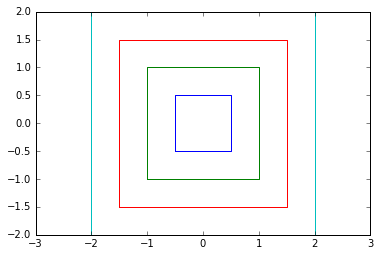

In [4]:
# Test code for the rectangle class:
fig, ax = init_figure()
for i in range(1,5):
    rect = Rectangle(base=i, height=i, center=(0.,0.))
    rect.plot(ax)

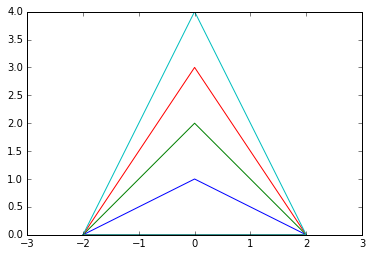

In [5]:
# Test code for the triangle class:
fig, ax = init_figure()

for height in range(1,5):
    tri = Triangle(base=4, height=height, center=(0.,0.))
    tri.plot(ax)

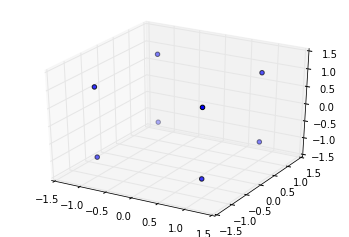

In [6]:
#Tests for the cuboid extension:
fig, ax = init_3dfigure()

cube = Cuboid(base=2, height=2, center=(0.,0.), depth=2)

cube.plot(ax)

## Magic Methods Extension

1. Override the `__str__` magic method in the `AbstractShape` base class so that printing gives information about the area, base and height store in any shape instance

2. Override the 'less than' magic method in the `AbstractShape` base class so that evaluating `shape1 < shape2` evaluates whether the area of shape 1 is less than shape 2

In [7]:
# Test code for __str__
square = Rectangle(4, 4, center=(0.,0.))
print(square)               # Did this do what you expected?

Shape object - base=4, height=4, Area=16


In [8]:
# Test code for iterator
bigsquare = Rectangle(8, 8, (0.,0.))
square < bigsquare

True

## Cheat Sheet

1. Code for `Triangle.get_vertices`:

        pts = np.ones([3, 2]) * self.center
        pts[0,:] += np.array([-self.base/2., 0])
        pts[1,:] += np.array([self.base/2., 0])
        pts[2,:] += np.array([0, self.height])
        return pts

2. Code for `Rectangle.get_vertices`:
        pts = np.ones([4, 2]) * self.center
        xshift = self.base / 2.
        yshift = self.height / 2.
        pts[0,:] += np.array([-xshift, -yshift])
        pts[1,:] += np.array([xshift, -yshift])
        pts[2,:] += np.array([xshift, yshift])
        pts[3,:] += np.array([-xshift, yshift])
        return pts